## Hypothesis

Store Location Hypotheses:

Hypothesis 1 (H0): The geographical location of a store has no significant impact on its sales.

Alternative Hypothesis (H1): The geographical location of a store significantly influences its sales. Stores in certain cities or regions may have higher sales than others.

Hypothesis 2 (H0): Store size does not affect sales.

Alternative Hypothesis (H1): The size of a store significantly impacts sales. Larger stores may generate higher sales due to greater product variety and customer foot traffic.

2. Product Attributes Hypotheses:

Hypothesis 3 (H0): The attributes (e.g., weight, visibility, etc.) of a product have no significant effect on its sales.

Alternative Hypothesis (H1): Certain product attributes significantly influence sales. For instance, products with higher visibility on store shelves may sell more.

Hypothesis 4 (H0): The type of product (e.g., perishable, non-perishable) does not affect sales.

Alternative Hypothesis (H1): Product type significantly impacts sales. Perishable products might have different sales patterns compared to non-perishables.

3. Time-Based Hypotheses:

Hypothesis 5 (H0): Seasonal variations do not have a significant effect on sales.

Alternative Hypothesis (H1): Seasonal factors significantly impact sales. For example, sales may increase during holidays or special promotions.

Hypothesis 6 (H0): Store performance remains consistent over the years.

Alternative Hypothesis (H1): Store performance changes over time, and sales trends may vary from year to year.

4. Interaction Hypotheses:

Hypothesis 7 (H0): There is no interaction effect between store location and product attributes on sales.

Alternative Hypothesis (H1): The combination of store location and specific product attributes can have a significant impact on sales.

5. Pricing Hypotheses:

Hypothesis 8 (H0): Price changes do not affect product sales significantly.

Alternative Hypothesis (H1): Changes in product pricing can lead to variations in sales. For example, lower prices may boost sales, while higher prices may lead to reduced sales.

6. Promotions and Advertising Hypotheses:

Hypothesis 9 (H0): Promotional activities and advertising do not have a significant impact on sales.

Alternative Hypothesis (H1): Effective promotions and advertising strategies can lead to increased product sales.

    This is the probable hypothesis according to me

In [1]:
import os #paths to file
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings# warning filter


#ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns

#feature engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#train test split
from sklearn.model_selection import train_test_split

#metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS


#ML models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso


#default theme and settings
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)
pd.options.display.max_columns

#warning hadle
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

In [2]:
import io
%cd "C:\Users\Narendra\Documents\DSS Excellfiles"

C:\Users\Narendra\Documents\DSS Excellfiles


In [3]:
naru=pd.read_csv("Test.csv")

In [4]:
ns=pd.read_csv("Train.csv")

In [5]:
print(naru.shape)
print(ns.shape)

(5681, 11)
(8523, 12)


In [6]:
naru.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [7]:
ns.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [8]:
print(naru.shape)
print(ns.shape)

(5681, 11)
(8523, 12)


In [9]:
naru.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [10]:
new = naru.T #Data transpose

In [11]:
new.head()

,0,1,2,3,4,5,6,7,8,9,...,5671,5672,5673,5674,5675,5676,5677,5678,5679,5680
Item_Identifier,FDW58,FDW14,NCN55,FDQ58,FDY38,FDH56,FDL48,FDC48,FDN33,FDA36,...,FDA01,NCH42,FDF46,DRL35,FDW46,FDB58,FDD47,NCO17,FDJ26,FDU37
Item_Weight,20.75,8.3,14.6,7.315,NaN,9.8,19.35,NaN,6.305,5.985,...,15.0,6.86,7.07,15.7,13.0,10.5,7.6,10.0,15.3,9.5
Item_Fat_Content,Low Fat,Regular,Low Fat,Low Fat,Regular,Regular,Regular,Low Fat,Regular,Low Fat,...,Regular,Low Fat,Low Fat,Low Fat,Regular,Regular,Regular,Low Fat,Regular,Regular
Item_Visibility,0.007565,0.038428,0.099575,0.015388,0.118599,0.063817,0.082602,0.015782,0.123365,0.005698,...,0.054463,0.036594,0.094053,0.030704,0.070411,0.013496,0.142991,0.073529,0.0,0.10472
Item_Type,Snack Foods,Dairy,Others,Snack Foods,Dairy,Fruits and Vegetables,Baking Goods,Baking Goods,Snack Foods,Baking Goods,...,Canned,Household,Snack Foods,Hard Drinks,Snack Foods,Snack Foods,Starchy Foods,Health and Hygiene,Canned,Canned


In [12]:
print(naru)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDW58       20.750          Low Fat         0.007565   
1              FDW14        8.300          Regular         0.038428   
2              NCN55       14.600          Low Fat         0.099575   
3              FDQ58        7.315          Low Fat         0.015388   
4              FDY38          NaN          Regular         0.118599   
...              ...          ...              ...              ...   
5676           FDB58       10.500          Regular         0.013496   
5677           FDD47        7.600          Regular         0.142991   
5678           NCO17       10.000          Low Fat         0.073529   
5679           FDJ26       15.300          Regular         0.000000   
5680           FDU37        9.500          Regular         0.104720   

               Item_Type  Item_MRP Outlet_Identifier  \
0            Snack Foods  107.8622            OUT049   
1                  Dairy   87.3198 

In [13]:
naru.sort_values("Outlet_Size",ascending = [False])

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
2846,FDU10,10.100,Regular,0.045692,Snack Foods,38.3848,OUT046,1997,Small,Tier 1,Supermarket Type1
1953,FDP39,12.650,Low Fat,0.069425,Meat,52.4324,OUT046,1997,Small,Tier 1,Supermarket Type1
4288,DRK01,NaN,Low Fat,0.106916,Soft Drinks,93.4436,OUT019,1985,Small,Tier 1,Grocery Store
4292,FDX60,14.350,Low Fat,0.080579,Baking Goods,77.9960,OUT035,2004,Small,Tier 2,Supermarket Type1
4295,FDL13,13.850,Regular,0.056308,Breakfast,231.8300,OUT035,2004,Small,Tier 2,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...,...
5668,FDC44,15.600,Low Fat,0.288892,Fruits and Vegetables,115.1518,OUT010,1998,NaN,Tier 3,Grocery Store
5670,FDO03,10.395,Regular,0.037092,Meat,229.4352,OUT017,2007,NaN,Tier 2,Supermarket Type1
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [14]:
naru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [15]:
naru.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [16]:
#list of all the numeric columns
num = naru.select_dtypes('number').columns.to_list()
#list of all the categoric columns
cat = naru.select_dtypes('object').columns.to_list()

#numeric df
BM_num =  naru[num]
#categoric df
BM_cat = naru[cat]

#print(num)
#print(cat)

[naru[category].value_counts() for category in cat[1:]]

[Low Fat    3602
 Regular    2013
 low fat      66
 Name: Item_Fat_Content, dtype: int64,
 Snack Foods              789
 Fruits and Vegetables    781
 Household                638
 Frozen Foods             570
 Dairy                    454
 Baking Goods             438
 Canned                   435
 Health and Hygiene       338
 Meat                     311
 Soft Drinks              281
 Breads                   165
 Hard Drinks              148
 Starchy Foods            121
 Others                   111
 Breakfast                 76
 Seafood                   25
 Name: Item_Type, dtype: int64,
 OUT027    624
 OUT013    621
 OUT035    620
 OUT046    620
 OUT049    620
 OUT045    619
 OUT018    618
 OUT017    617
 OUT010    370
 OUT019    352
 Name: Outlet_Identifier, dtype: int64,
 Medium    1862
 Small     1592
 High       621
 Name: Outlet_Size, dtype: int64,
 Tier 3    2233
 Tier 2    1856
 Tier 1    1592
 Name: Outlet_Location_Type, dtype: int64,
 Supermarket Type1    3717
 Grocery

In [17]:
naru.groupby("Item_Type",sort=False)["Item_MRP"].sum()

Item_Type
Snack Foods              115875.6350
Dairy                     65977.9536
Others                    14996.7216
Fruits and Vegetables    112360.3474
Baking Goods              56524.9092
Health and Hygiene        46180.8928
Breads                    23439.0574
Hard Drinks               20366.1246
Seafood                    3496.8288
Soft Drinks               39788.9400
Household                 94267.5778
Frozen Foods              76043.6098
Meat                      43804.4162
Canned                    59558.3676
Starchy Foods             18403.2384
Breakfast                 10068.5960
Name: Item_MRP, dtype: float64

In [18]:
fresh = naru[naru["Outlet_Establishment_Year"] > 2008]


In [19]:
print("Outlet_Size:\n", naru.Outlet_Size.value_counts(), "\n\n")
print("Item_Weight:\n", ns.Item_Weight.value_counts(), "\n\n")

Outlet_Size:
 Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64 


Item_Weight:
 12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
6.775      2
9.420      1
6.520      1
5.400      1
7.685      1
Name: Item_Weight, Length: 415, dtype: int64 




In [20]:
fresh.shape

(618, 11)

## Cleaning Data

In [21]:

naru.isnull()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,True,False,False
4,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
5676,False,False,False,False,False,False,False,False,False,False,False
5677,False,False,False,False,False,False,False,False,False,False,False
5678,False,False,False,False,False,False,False,False,True,False,False
5679,False,False,False,False,False,False,False,False,True,False,False


In [22]:
naru.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

## Filling null values

In [23]:
naru2 = naru.fillna(method = "pad") #filling null values with previous value

In [24]:
naru2.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [25]:
naru3 = naru2.fillna(value = naru2['Item_Weight'].mean())

In [26]:
naru3.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,7.315,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [27]:
naru3.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,7.315,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
5,FDH56,9.800,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1
6,FDL48,19.350,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2
7,FDC48,19.350,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3
8,FDN33,6.305,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,Medium,Tier 2,Supermarket Type1
9,FDA36,5.985,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,Medium,Tier 2,Supermarket Type1


In [28]:
#Outlet_Establishment_Year is quite useless as it is, making a new column with the age the new name will be Outlet_Age
naru['Outlet_Age'], ns['Outlet_Age']= naru['Outlet_Establishment_Year'].apply(lambda year: 2020 - year), ns['Outlet_Establishment_Year'].apply(lambda year: 2020 - year)


In [29]:
print("test mode, train mode\n",[naru['Outlet_Size'].mode().values[0], ns['Outlet_Size'].mode().values[0]])

test mode, train mode
 ['Medium', 'Medium']


In [30]:
naru['Outlet_Size'] = naru['Outlet_Size'].fillna(
naru['Outlet_Size'].dropna().mode().values[0])

#test
ns['Outlet_Size'] = ns['Outlet_Size'].fillna(
ns['Outlet_Size'].dropna().mode().values[0])

#checking if we filled missing values
naru['Outlet_Size'].isnull().sum(),ns['Outlet_Size'].isnull().sum()

(0, 0)

In [31]:
naru['Item_Weight'] = naru['Item_Weight'].fillna(
naru['Item_Weight'].dropna().mean())

#test
ns['Item_Weight'] = ns['Item_Weight'].fillna(
ns['Item_Weight'].dropna().mean())

#checking if we filled missing values
naru['Item_Weight'].isnull().sum(),ns['Item_Weight'].isnull().sum()

(0, 0)

## Exploratory Data Analysis 

In [32]:
# Handling duplicates 

In [33]:
Dupli = naru.duplicated()

In [34]:
print(Dupli.sum())

0


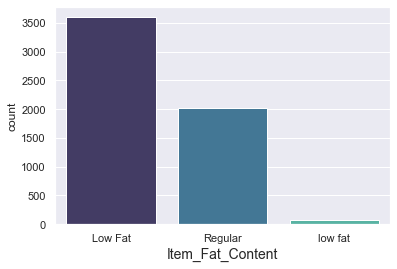

In [35]:
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

plt.figure(figsize=(6,4))
sns.countplot(x='Item_Fat_Content' , data=naru ,palette='mako')
plt.xlabel('Item_Fat_Content', fontsize=14)
plt.show()

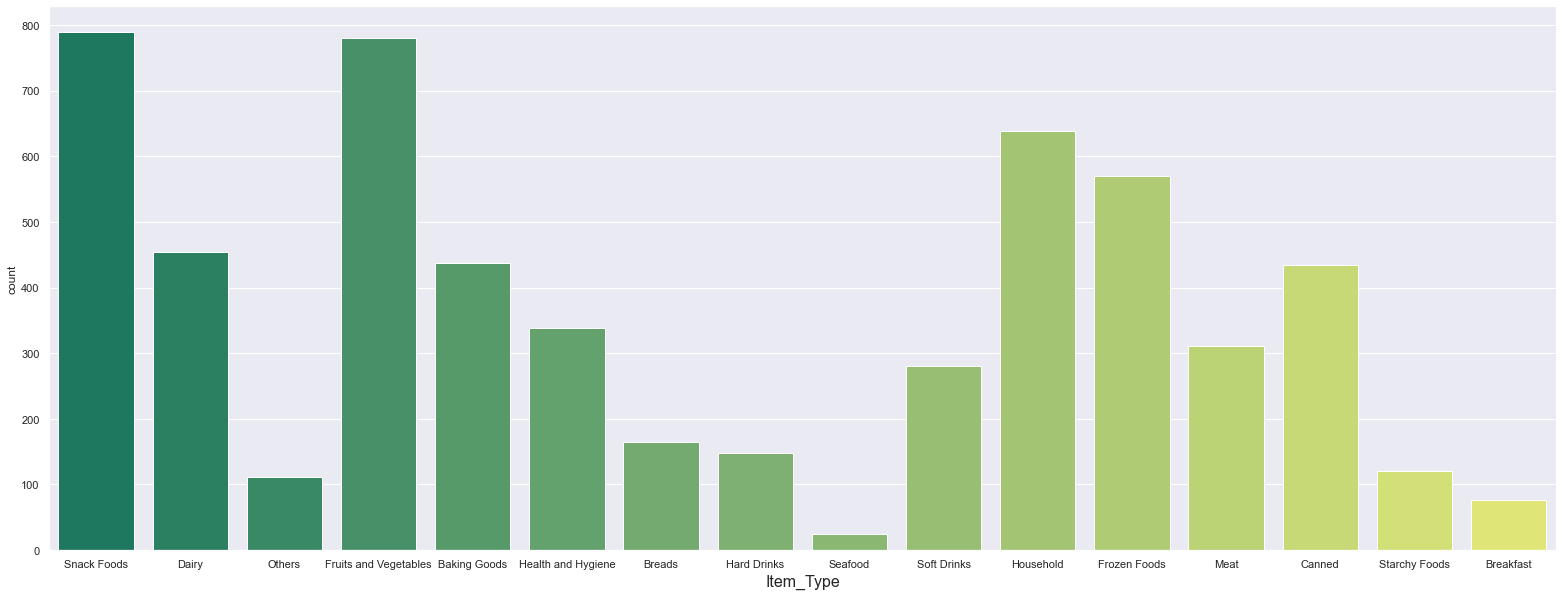

In [36]:
plt.figure(figsize=(27,10))
sns.countplot(x='Item_Type' , data=naru ,palette='summer')
plt.xlabel('Item_Type', fontsize=16)
plt.show()

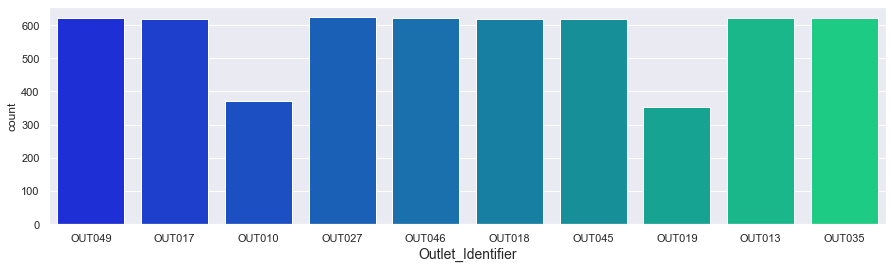

In [37]:
plt.figure(figsize=(15,4))
sns.countplot(x='Outlet_Identifier' , data=naru ,palette='winter')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.show()

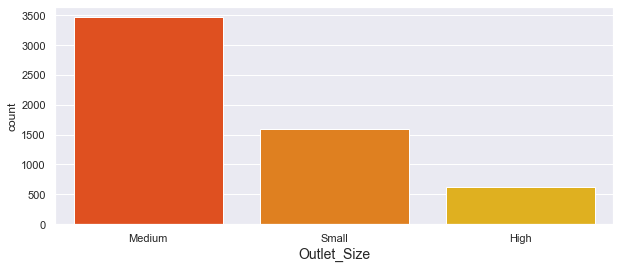

In [38]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Size' , data=naru ,palette='autumn')
plt.xlabel('Outlet_Size', fontsize=14)
plt.show()

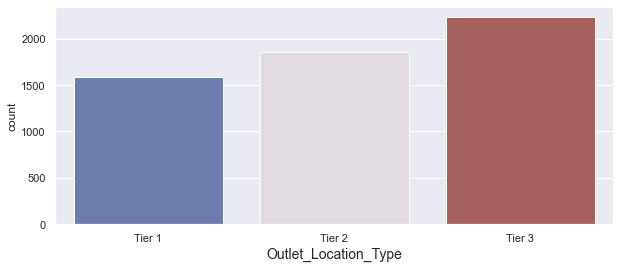

In [39]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Location_Type' , data=naru ,palette='twilight_shifted')
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.show()

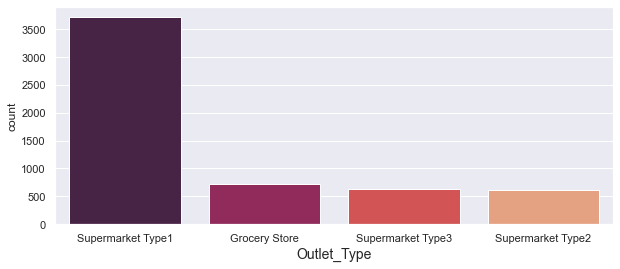

In [40]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Type' , data=naru ,palette='rocket')
plt.xlabel('Outlet_Type', fontsize=14)
plt.show()

#### Realizations from Categorical columns

In [41]:
#1.Item_Fat_Content - Most items sold are low fat.
#2.Item_Type - Item types that are distictly popular are fruits and vegetables and snack foods.
#3.Outlet_Identifier - Sold items are ditributed evenly among outlets excluding OUT010 and OUT019 that are significanly lower.
#4.Outlet_Size - Bigmart outlets are mostly medium sized in our data.
#5.Outlet_Location_Type - The most common type is Tier3.
#6.Outlet_Type - By a wide margin the mode outlet type is Supermarket Type1.

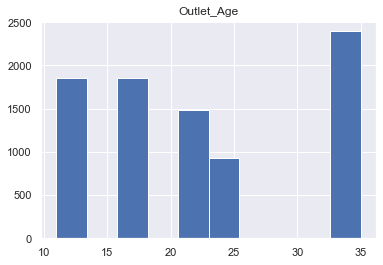

In [42]:
num = ns.select_dtypes('number').columns.to_list()
BM_num =  ns[num]

plt.hist(ns['Outlet_Age'])
plt.title("Outlet_Age")
plt.show()

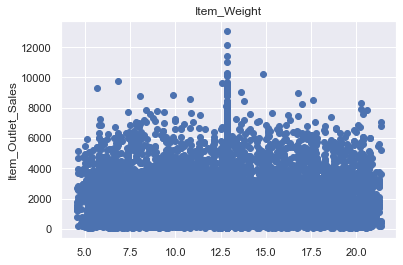

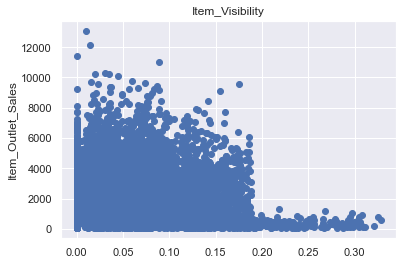

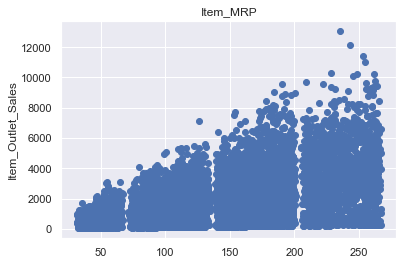

In [43]:
for numeric in BM_num[num[:3]]:
    plt.scatter(BM_num[numeric], BM_num['Item_Outlet_Sales'])
    plt.title(numeric)
    plt.ylabel('Item_Outlet_Sales')
    plt.show()

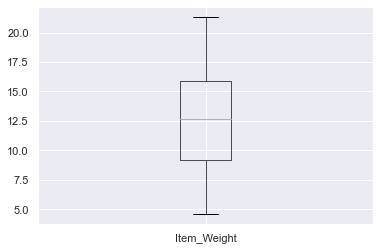

In [44]:
naru.boxplot(column=["Item_Weight"])
plt.show() #There is no outlier in this column

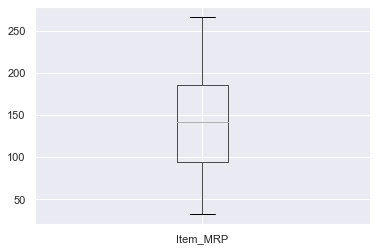

In [45]:
naru.boxplot(column=["Item_MRP"])
plt.show()

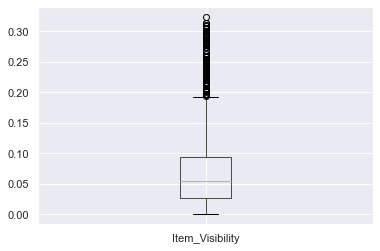

In [46]:
naru.boxplot(column=["Item_Visibility"])
plt.show() #There are outliers in this column

## Removing outliers

In [47]:
naru["Item_Visibility"].mean()

0.06568385968808292

In [48]:
out = naru[naru["Item_Visibility"]<0.18]

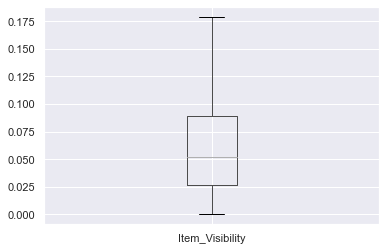

In [49]:
out.boxplot(column=["Item_Visibility"])
plt.show() #Successfully removed outliers

In [50]:
out["Item_Visibility"].mean()

0.0612341265667268

### Univariate analysis for outlet type

In [51]:
out_Sf = naru3.loc[naru['Item_Type'] == 'Snack Foods']

In [52]:
out_Da = naru3.loc[naru['Item_Type'] == 'Dairy']

In [53]:
out_ot = naru3.loc[naru['Item_Type'] == 'Other']

In [54]:
out_fv = naru3.loc[naru['Item_Type'] == 'Fruits and Vegetables']

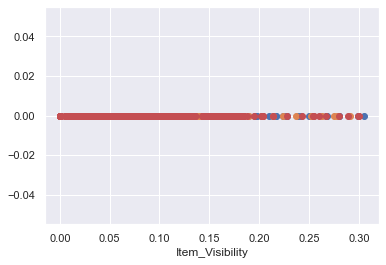

In [55]:
plt.plot(out_Sf['Item_Visibility'],np.zeros_like(out_Sf['Item_Visibility']),'o')
plt.plot(out_Da['Item_Visibility'],np.zeros_like(out_Da['Item_Visibility']),'o')
plt.plot(out_ot['Item_Visibility'],np.zeros_like(out_ot['Item_Visibility']),'o')
plt.plot(out_fv['Item_Visibility'],np.zeros_like(out_fv['Item_Visibility']),'o')
plt.xlabel('Item_Visibility')
plt.show()

## Bivariate analysis

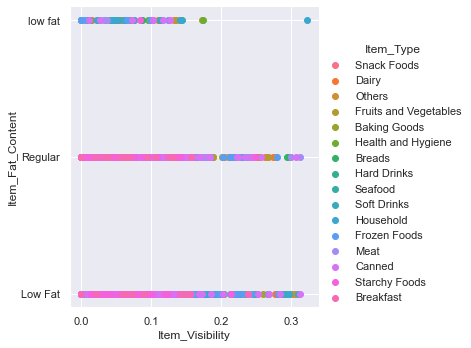

In [56]:
sns.FacetGrid(naru3,hue='Item_Type',size=5).map(plt.scatter,'Item_Visibility','Item_Fat_Content').add_legend();
plt.show()

### Corraltion Matrix

<AxesSubplot:>

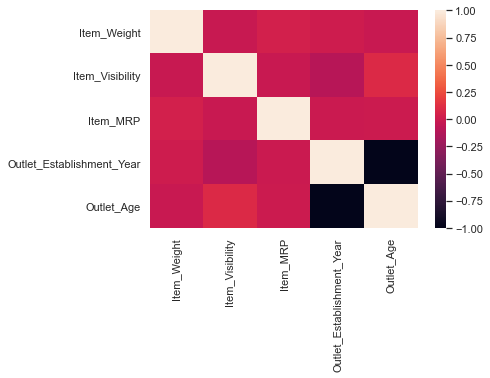

In [57]:
sns.heatmap(naru.corr() ,cmap='rocket')

### Feature Engineering
**Categorical values**:

We have 7 columns we need to delete or encode.

* Ordinal variables:
    * `Item_Fat_Content`  
    * `Outlet_Size`  
    * `Outlet_Location_Type`
    
* Nominal variables:
    * `Item_Identifier `  
    * `Item_Type`
    * `Outlet_Identifier`
    * `Outlet_Type`

**Numeric values**:

* From the numeric variables `Outlet_Establishment_Year` is no longer needed

**Conclusion:**

In my FE process i have decided:

1. The columns `Outlet_Establishment_Year`, `Item_Identifier ` and `Outlet_Identifier` don't have significant values so we will drop them.
2. All Ordinal variables will be Label encoded.
3. The columns `Outlet_Type` and `Item_Type`  will be One Hot encoded.



In [58]:
BM_cat.apply(lambda x: x.nunique()) #checking the number of unique values in each column

Item_Identifier         1543
Item_Fat_Content           3
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [59]:
#lable encoding

le = LabelEncoder()
Label = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type']

for i in Label:
    naru[i] = le.fit_transform(naru[i])
    ns[i] = le.fit_transform(ns[i])

naru.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,FDW58,20.750000,0,0.007565,Snack Foods,107.8622,OUT049,1999,1,0,Supermarket Type1,21
1,FDW14,8.300000,1,0.038428,Dairy,87.3198,OUT017,2007,1,1,Supermarket Type1,13
2,NCN55,14.600000,0,0.099575,Others,241.7538,OUT010,1998,1,2,Grocery Store,22
3,FDQ58,7.315000,0,0.015388,Snack Foods,155.0340,OUT017,2007,1,1,Supermarket Type1,13
4,FDY38,12.695633,1,0.118599,Dairy,234.2300,OUT027,1985,1,2,Supermarket Type3,35


In [60]:
#one hot encoding
cols = ['Item_Type','Outlet_Type']
# Apply one-hot encoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
naru_oh = pd.DataFrame(OH_encoder.fit_transform(naru[cols])).astype('int64')
ns_oh = pd.DataFrame(OH_encoder.fit_transform(ns[cols])).astype('int64')


#get feature columns
naru_oh.columns = OH_encoder.get_feature_names(cols)
ns_oh.columns = OH_encoder.get_feature_names(cols)

# One-hot encoding removed index; put it back
naru_oh.index = naru.index
ns_oh.index = ns.index

# Add one-hot encoded columns to our main df new name: tr_fe, te_fe (means feature engeenired)
naru_fe = pd.concat([naru, naru_oh], axis=1)
ns_fe = pd.concat([ns, ns_oh], axis=1)

In [61]:
# Dropping irrelevant columns

naru_fe  = naru_fe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)
ns_fe = ns_fe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)

In [62]:
naru_fe.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Age,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750000,0,0.007565,107.8622,1,0,21,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,8.300000,1,0.038428,87.3198,1,1,13,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,14.600000,0,0.099575,241.7538,1,2,22,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,7.315000,0,0.015388,155.0340,1,1,13,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,12.695633,1,0.118599,234.2300,1,2,35,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [63]:
naru_fe = naru.fillna(method = "pad")

In [64]:
naru_fe.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Outlet_Age                   0
dtype: int64

In [65]:
ns_fe.isnull().sum()

Item_Weight                        0
Item_Fat_Content                   0
Item_Visibility                    0
Item_MRP                           0
Outlet_Size                        0
Outlet_Location_Type               0
Item_Outlet_Sales                  0
Outlet_Age                         0
Item_Type_Baking Goods             0
Item_Type_Breads                   0
Item_Type_Breakfast                0
Item_Type_Canned                   0
Item_Type_Dairy                    0
Item_Type_Frozen Foods             0
Item_Type_Fruits and Vegetables    0
Item_Type_Hard Drinks              0
Item_Type_Health and Hygiene       0
Item_Type_Household                0
Item_Type_Meat                     0
Item_Type_Others                   0
Item_Type_Seafood                  0
Item_Type_Snack Foods              0
Item_Type_Soft Drinks              0
Item_Type_Starchy Foods            0
Outlet_Type_Grocery Store          0
Outlet_Type_Supermarket Type1      0
Outlet_Type_Supermarket Type2      0
O

### Machine learning models


First of all we will divide our dataset into two variables X as the features we defined earlier and y as the Item_Outlet_Sales the target value we want to predict.

Assumptions:

This is a regression problem so we will use Regression methods.

Train test split will be a 8:2 ratio respectively.

Models we will use:
Linear Regression
Random Forest Regressor
Lasso Regressor
The Process of Modeling the Data:
Importing the model

Fitting the model

Predicting Item Outlet Sales

Regression metrics

Score Metrics for Regression:
Mean Absolute Error (MAE) - Mean of the absolute value of errors (absolute distance from true value): 

Mean Squared Error (MSE) - Mean of the squared value of errors (squared distance from true value): 

R^2 (coefficient of determination) - Regression score function.: 

In [66]:
y = ns_fe['Item_Outlet_Sales']
X = ns_fe.drop('Item_Outlet_Sales', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 0)

In [67]:
def cross_val(model_name,model,X,y,cv):

    scores = CVS(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),4)}')

### Linear Regression


In statistics, linear regression is a linear approach to modelling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables).

Linear regression was the first type of regression analysis to be studied rigorously, and to be used extensively in practical applications. This is because models which depend linearly on their unknown parameters are easier to fit than models which are non-linearly related to their parameters and because the statistical properties of the resulting estimators are easier to determine (more info on wikipedia).

In [68]:
LR = LinearRegression(normalize=True)

#fit
LR.fit(X_train, y_train)

#predict
y_predict = LR.predict(X_test)

#score variables
LR_MAE = round(MAE(y_test, y_predict),2)
LR_MSE = round(MSE(y_test, y_predict),2)
LR_R_2 = round(R2(y_test, y_predict),4)
LR_CS  = round(CVS(LR, X, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {LR_MAE}\n")
print(f" Mean Squared Error: {LR_MSE}\n")
print(f" R^2 Score: {LR_R_2}\n")
cross_val(LR,LinearRegression(),X,y,5)

 Mean Absolute Error: 838.15

 Mean Squared Error: 1285773.84

 R^2 Score: 0.5593

LinearRegression(normalize=True) Scores:
0.57
0.55
0.55
0.56
0.56
Average LinearRegression(normalize=True) score: 0.558


### Random Forest Regressor


Random forest is a Supervised Learning algorithm which uses ensemble learning method for classification and regression. It operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

In [70]:
RFR= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=101)
#fit
RFR.fit(X_train, y_train)
#predict
y_predict = RFR.predict(X_test)

#score variables
RFR_MAE = round(MAE(y_test, y_predict),2)
RFR_MSE = round(MSE(y_test, y_predict),2)
RFR_R_2 = round(R2(y_test, y_predict),4)
RFR_CS  = round(CVS(RFR, X, y, cv=5).mean(),4)



print(f" Mean Absolute Error: {RFR_MAE}\n")
print(f" Mean Squared Error: {RFR_MSE}\n")
print(f" R^2 Score: {RFR_R_2}\n")
cross_val(RFR,RandomForestRegressor(),X,y,5)


 Mean Absolute Error: 1030.25

 Mean Squared Error: 1963936.78

 R^2 Score: 0.3268

RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=101) Scores:
0.57
0.53
0.53
0.56
0.56
Average RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=101) score: 0.5495


### Lasso Regressor


In statistics and machine learning, lasso (least absolute shrinkage and selection operator; also Lasso or LASSO) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the statistical model it produces 

In [71]:
LS = Lasso(alpha = 0.05)
#fit
LS.fit(X_train,y_train)

#predict
y_predict = LS.predict(X_test)

#score variables
LS_MAE = round(MAE(y_test, y_predict),2)
LS_MSE = round(MSE(y_test, y_predict),2)
LS_R_2 = round(R2(y_test, y_predict),4)
LS_CS  = round(CVS(LS, X, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {LS_MAE}\n")
print(f" Mean Squared Error: {LS_MSE}\n")
print(f" R^2 Score: {LS_R_2}\n")
cross_val(LS,Lasso(alpha = 0.05),X,y,5)

 Mean Absolute Error: 838.04

 Mean Squared Error: 1285537.19

 R^2 Score: 0.5594

Lasso(alpha=0.05) Scores:
0.57
0.55
0.55
0.56
0.56
Average Lasso(alpha=0.05) score: 0.5581


In [72]:
#comparing the algorithms based on scores
MAE= [LR_MAE,RFR_MAE,LS_MAE]
MSE= [LR_MSE,RFR_MSE,LS_MSE]
R_2= [LR_R_2,RFR_R_2,LS_R_2]
Cross_score= [LR_CS,RFR_CS,LS_CS]

Models = pd.DataFrame({
    'models': ["Linear Regression","Random Forest Regressor","Lasso Regressor"],
    'MAE': MAE, 'MSE': MSE, 'R^2':R_2, 'Cross Validation Score':Cross_score})
Models.sort_values(by='MAE', ascending=True)

,models,MAE,MSE,R^2,Cross Validation Score
2,Lasso Regressor,838.04,1285537.19,0.5594,0.5581
0,Linear Regression,838.15,1285773.84,0.5593,0.5579
1,Random Forest Regressor,1030.25,1963936.78,0.3268,0.5920


### Conclusion


* `Item_MRP`  optimizes Maximum Outlet sales (positive correlation with the target).
* Linear Regression	and Lasso Regressor have the best perfomance in most categories.
* only a third of the observed variation can be explained by the model's inputs of Random Forest Regressor, there for it's performance is not optimal even though his cross validation is the highest.
* For better peformance this models need tuning e.g. Grid Search.